In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# Load data

In [55]:
train_set = pd.read_csv('../data/train.csv')
test_set = pd.read_csv('../data/test.csv')

In [38]:
cat_cols = ['EJ']
id_cols = ['Id']
target_col = ['Class']
features = [col for col in train_set.columns if col not in cat_cols + id_cols + target_col]

In [39]:
train_set.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EJ,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,22.5984,175.638726,152.707705,823.928241,257.432377,47.223358,0.563481,23.387600,4.851915,0.023482,1.050225,0.069225,13.784111,1.302012,36.205956,69.08340,295.570575,0.23868,0.284232,89.245560,84.31664,29.657104,5.310690,1.74307,23.187704,7.294176,1.987283,1433.166750,0.949104,B,30.879420,78.526968,3.828384,13.394640,10.265073,9028.291921,3.583450,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,19.4205,155.868030,14.754720,51.216883,257.432377,30.284345,0.484710,50.628208,6.085041,0.031442,1.113875,1.117800,28.310953,1.357182,37.476568,70.79836,178.553100,0.23868,0.363489,110.581815,75.74548,37.532000,0.005518,1.74307,17.222328,4.926396,0.858603,1111.287150,0.003042,A,109.125159,95.415086,52.260480,17.175984,0.296850,6785.003474,10.358927,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,26.4825,128.988531,219.320160,482.141594,257.432377,32.563713,0.495852,85.955376,5.376488,0.036218,1.050225,0.700350,39.364743,1.009611,21.459644,70.81970,321.426625,0.23868,0.210441,120.056438,65.46984,28.053464,1.289739,1.74307,36.861352,7.813674,8.146651,1494.076488,0.377208,B,109.125159,78.526968,5.390628,224.207424,8.745201,8338.906181,11.626917,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,23.6577,237.282264,11.050410,661.518640,257.432377,15.201914,0.717882,88.159360,2.347652,0.029054,1.400300,0.636075,41.116960,0.722727,21.530392,47.27586,196.607985,0.23868,0.292431,139.824570,71.57120,24.354856,2.655345,1.74307,52.003884,7.386060,3.813326,15691.552180,0.614484,B,31.674357,78.526968,31.323372,59.301984,7.884336,10965.766040,14.852022,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,24.0108,324.546318,149.717165,6074.859475,257.432377,82.213495,0.536467,72.644264,30.537722,0.025472,1.050225,0.693150,31.724726,0.827550,34.415360,74.06532,200.178160,0.23868,0.207708,97.920120,52.83888,26.019912,1.144902,1.74307,9.064856,7.350720,3.490846,1403.656300,0.164268,B,109.125159,91.994825,51.141336,29.102640,4.274640,16198.049590,13.666727,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [40]:
na_mean = train_set.isna().mean(axis=0)
na_mean[na_mean > 0]

BQ    0.097245
CB    0.003241
CC    0.004862
DU    0.001621
EL    0.097245
FC    0.001621
FL    0.001621
FS    0.003241
GL    0.001621
dtype: float64

<Axes: >

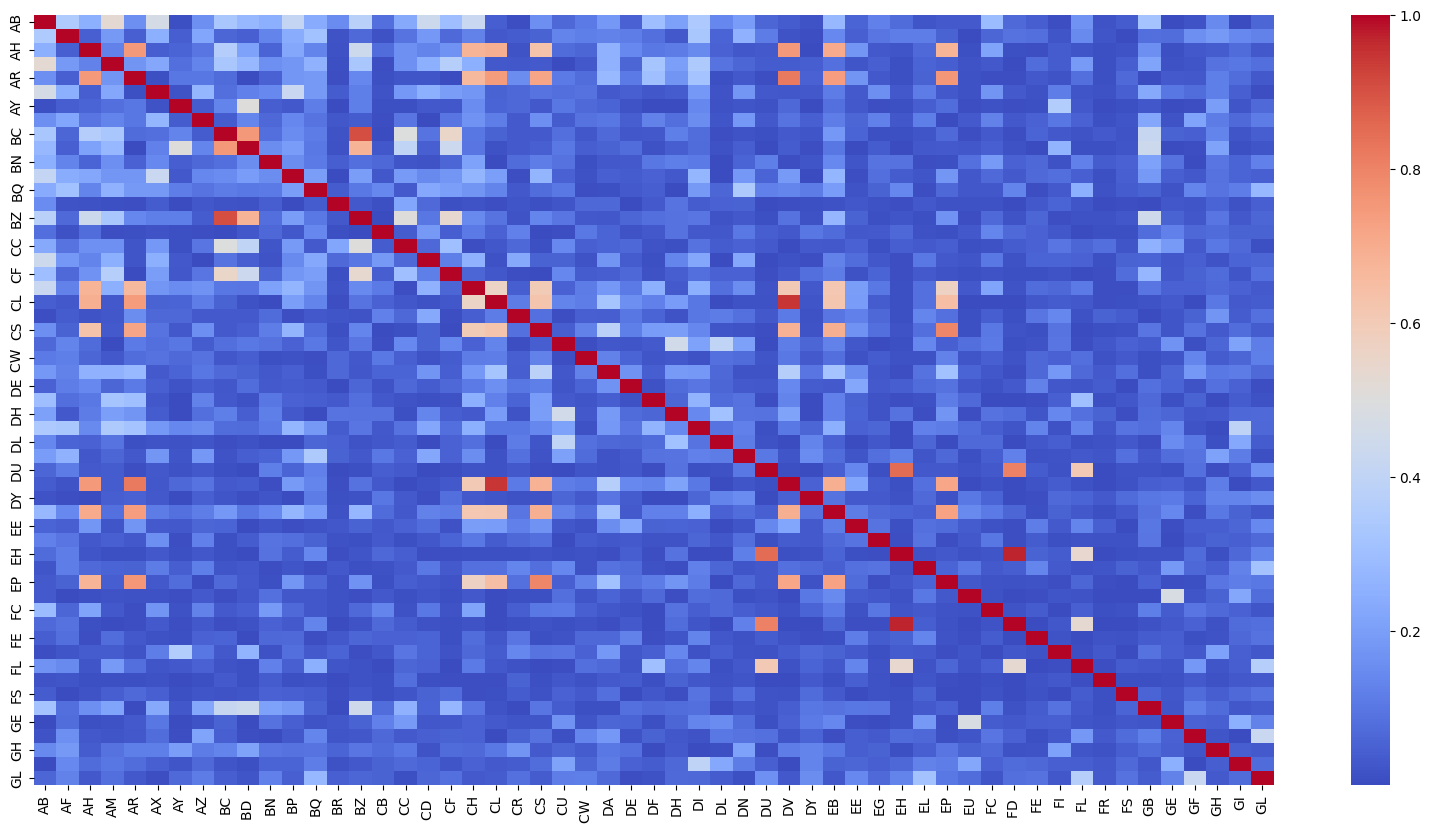

In [41]:
plt.figure(figsize=(20, 10))
corr_abs = train_set[features].corr().abs()
sns.heatmap(corr_abs, cmap='coolwarm',)

<Axes: >

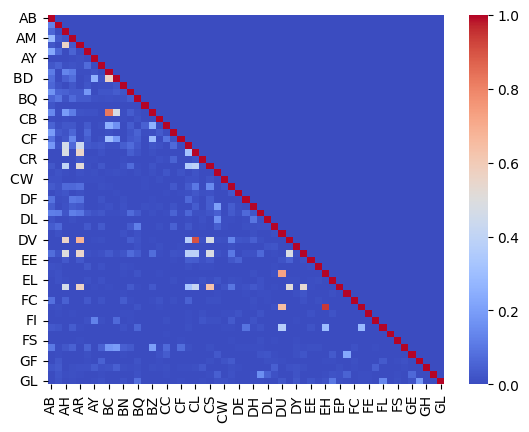

In [42]:
corr_abs = np.tril(corr_abs) * corr_abs
sns.heatmap(corr_abs, cmap='coolwarm',)


In [43]:
corr_abs_melt = corr_abs.reset_index().melt(id_vars='index')
corr_abs_melt = corr_abs_melt.query("value < 1 and value >= 0.6 and value != 0")
corr_abs_melt

,index,variable,value
253,DV,AR,0.677348
454,BZ,BC,0.824429
1133,DV,CL,0.900585
1250,EP,CS,0.630687
1798,EH,DU,0.724127
1803,FD,DU,0.649618
2133,FD,EH,0.943137


In [44]:
features = np.setdiff1d(features, corr_abs_melt['index'].unique())

<Axes: >

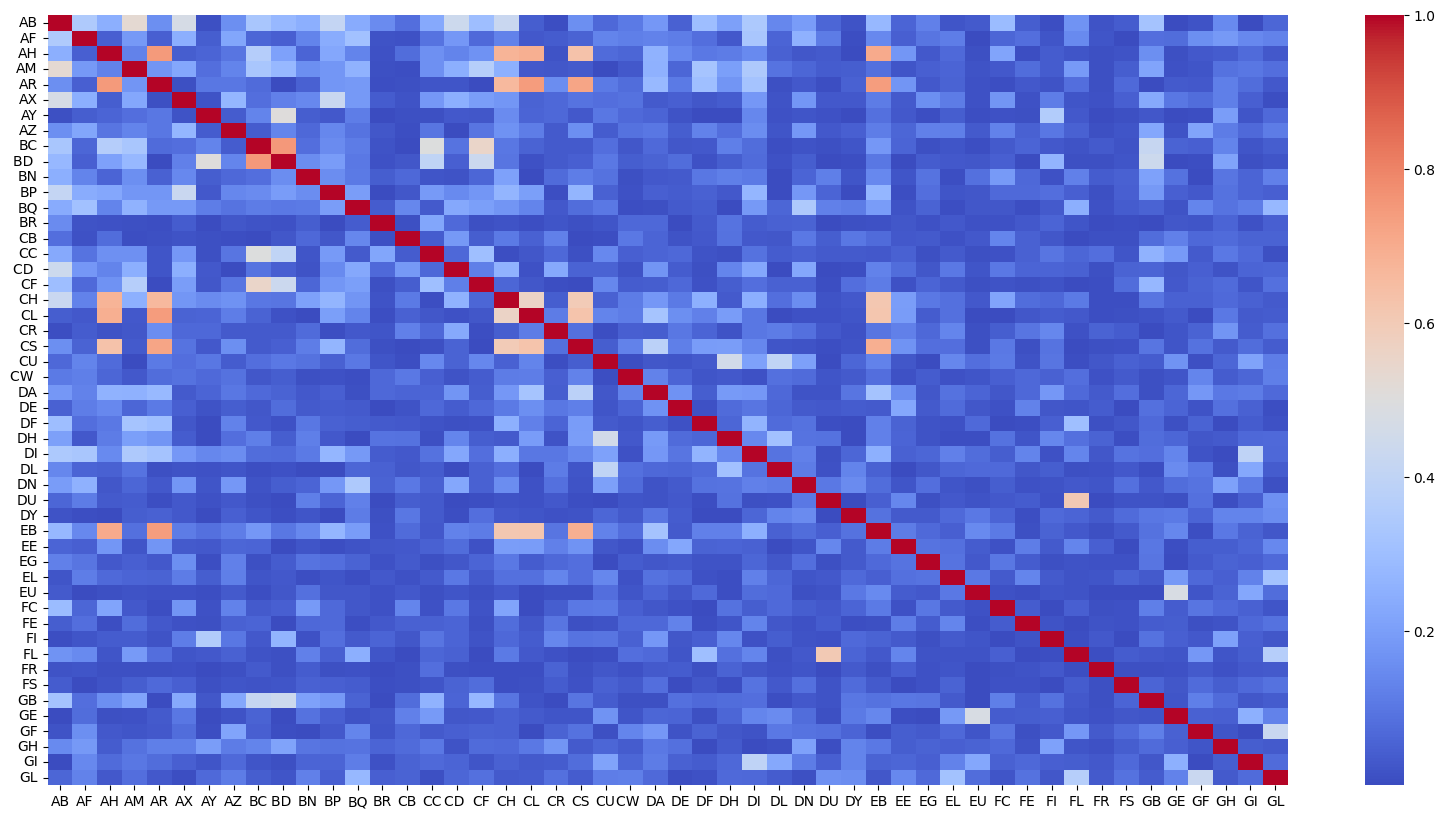

In [46]:
plt.figure(figsize=(20, 10))
corr_abs = train_set[features].corr().abs()
sns.heatmap(corr_abs, cmap='coolwarm',)

In [50]:
train_set[features].corrwith(train_set['Class'],).abs().sort_values(ascending=False)

AF     0.302638
BQ     0.281257
AB     0.280612
DU     0.261000
DI     0.260760
FL     0.244185
AM     0.239170
CR     0.227547
FE     0.216359
DH     0.206839
DA     0.204612
BN     0.198283
CD     0.171304
BP     0.157286
BC     0.155882
DL     0.147716
EE     0.135324
GF     0.128208
DE     0.124977
GL     0.119202
BD     0.112184
CF     0.109748
FR     0.104099
AX     0.097616
FI     0.094327
BR     0.088554
EB     0.088005
GB     0.083343
CU     0.083185
AY     0.082420
GI     0.076894
GE     0.070766
EL     0.067947
AR     0.064380
DF     0.064272
DY     0.062734
CW     0.062639
CC     0.054723
CS     0.047438
AH     0.044645
EU     0.039739
GH     0.033540
FC     0.030689
EG     0.024610
CL     0.016852
CB     0.014777
AZ     0.013516
DN     0.008478
CH     0.008144
FS     0.001139
dtype: float64

In [66]:
def balanced_log_loss(y_true, y_pred):
    # y_true: correct labels 0, 1
    # y_pred: predicted probabilities of class=1
    # calculate the number of observations for each class
    N_0 = np.sum(1 - y_true)
    N_1 = np.sum(y_true)
    # calculate the weights for each class to balance classes
    w_0 = 1 / N_0
    w_1 = 1 / N_1
    # calculate the predicted probabilities for each class
    p_1 = np.clip(y_pred, 1e-15, 1 - 1e-15)
    p_0 = 1 - p_1
    # calculate the summed log loss for each class
    log_loss_0 = -np.sum((1 - y_true) * np.log(p_0))
    log_loss_1 = -np.sum(y_true * np.log(p_1))
    # calculate the weighted summed logarithmic loss
    # (factgor of 2 included to give same result as LL with balanced input)
    balanced_log_loss = 2*(w_0 * log_loss_0 + w_1 * log_loss_1) / (w_0 + w_1)
    # return the average log loss
    return balanced_log_loss/(N_0+N_1)

from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer


In [69]:
features_with_cat = list(features) + cat_cols
cat_col_idx = [len(features_with_cat) - 1]
cross_val_score(CatBoostClassifier(verbose=0, cat_features=cat_col_idx), train_set[features_with_cat], train_set['Class'], scoring=make_scorer(balanced_log_loss), cv=5)

array([3.76476486, 2.78539663, 3.06829407, 3.91754957, 1.49305264])

In [72]:
np.array([3.76476486, 2.78539663, 3.06829407, 3.91754957, 1.49305264]).mean()

3.005811554